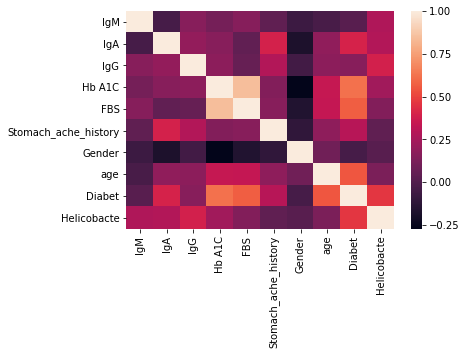

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

data= pd.read_excel("Integrated Data.xlsx",na_values=missing_value, delimiter=",")
Var_Corr = data.corr()

# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)


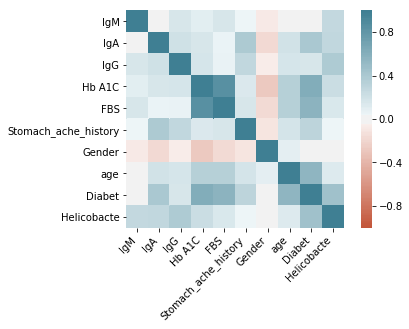

In [4]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
corr.style.background_gradient(cmap='coolwarm')

,IgM,IgA,IgG,Hb A1C,FBS,Stomach_ache_history,Gender,age,Diabet,Helicobacte
IgM,1,-0.0335503,0.164357,0.108265,0.159473,0.0464989,-0.0717776,-0.0314047,0.021458,0.278229
IgA,-0.0335503,1,0.198373,0.16319,0.0511965,0.398097,-0.172915,0.188195,0.401974,0.287409
IgG,0.164357,0.198373,1,0.177655,0.0625245,0.288968,-0.0482447,0.177957,0.163372,0.389649
Hb A1C,0.108265,0.16319,0.177655,1,0.849279,0.146351,-0.270908,0.346087,0.618912,0.23655
FBS,0.159473,0.0511965,0.0625245,0.849279,1,0.165701,-0.15789,0.344232,0.570555,0.148755
Stomach_ache_history,0.0464989,0.398097,0.288968,0.146351,0.165701,1,-0.107786,0.185004,0.301511,0.0447543
Gender,-0.0717776,-0.172915,-0.0482447,-0.270908,-0.15789,-0.107786,1,0.095329,-0.0342796,0.0208793
age,-0.0314047,0.188195,0.177957,0.346087,0.344232,0.185004,0.095329,1,0.550708,0.127604
Diabet,0.021458,0.401974,0.163372,0.618912,0.570555,0.301511,-0.0342796,0.550708,1,0.465773
Helicobacte,0.278229,0.287409,0.389649,0.23655,0.148755,0.0447543,0.0208793,0.127604,0.465773,1


In [6]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [7]:
def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

# A = np.array([[ 2.0,  140.0,  128.23, -150.5, -5.4  ],
#               [ 2.4,  153.11, 130.34, -130.1, -9.5  ],
#               [ 1.2,  156.9,  120.11, -110.45,-1.12 ]])

A = data.values[:,1:].astype(float)

bins = data.shape # ?
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
matMI = pd.DataFrame(matMI)
matMI.columns = (data.columns.values[1:])
print(matMI)
# matMI.style.background_gradient(cmap='coolwarm')        


   IgA       IgG    Hb A1C       FBS  Stomach_ache_history    Gender  \
0  0.0  0.823404  0.663008  0.701367              0.184081  0.124616   
1  0.0  0.000000  0.697537  0.672742              0.301086  0.187330   
2  0.0  0.000000  0.000000  1.014762              0.236189  0.220863   
3  0.0  0.000000  0.000000  0.000000              0.222257  0.123530   
4  0.0  0.000000  0.000000  0.000000              0.000000  0.006032   
5  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   
6  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   
7  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   
8  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   

        age    Diabet  Helicobacte  
0  0.875919  0.246850     0.165118  
1  0.988788  0.244355     0.295758  
2  1.039762  0.613691     0.287664  
3  1.061011  0.486252     0.174608  
4  0.077076  0.048513     0.001023  
5  0.065509  0.000588     0.000219  
6  0.000000  0.41734

In [8]:
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = normalized_mutual_info_score(A[:,ix], A[:,jx])
matMI = pd.DataFrame(matMI)
matMI.columns = (data.columns.values[1:])
print(matMI)
# matMI.style.background_gradient(cmap='coolwarm')        


   IgA       IgG    Hb A1C       FBS  Stomach_ache_history    Gender  \
0  0.0  0.988585  0.895629  0.937087              0.343055  0.377361   
1  0.0  0.000000  0.901914  0.937087              0.326417  0.391436   
2  0.0  0.000000  0.000000  0.828584              0.246158  0.224658   
3  0.0  0.000000  0.000000  0.000000              0.326388  0.278957   
4  0.0  0.000000  0.000000  0.000000              0.000000  0.010711   
5  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   
6  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   
7  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   
8  0.0  0.000000  0.000000  0.000000              0.000000  0.000000   

        age    Diabet  Helicobacte  
0  0.942014  0.400002     0.378184  
1  0.942014  0.413795     0.392717  
2  0.841634  0.403569     0.247429  
3  0.882979  0.368802     0.297051  
4  0.220083  0.084422     0.001876  
5  0.307042  0.000865     0.000339  
6  0.000000  0.29817

c:\program files\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
